# Dissecting Spotify Valence

In this assignment we will dissect Spotify's Valence metric.


> Ilias Dimos <br />
> Msc Business Analytics <br />
> Assignment 2  <br />
> AM : f2822102

# Preperation of the data 

> * In this section of the assignment we found online a dataset with features of 586672 spotify songs. For the purpose of the assignment we dropped the columns that the features of each song are contained.Secondly , with the proper commands and functions we found them again via Spotify API and we saved them as a dataframe named "track features". __Its very important to mention that we used some functions as they are from the Analytics Practicum 1 notebooks named "Spotify API" , "05_stats_python".__

#### __Usefull libraries for our Analysis.__ 

In [7]:
import pandas as pd
from zipfile import ZipFile
import pandas as pd
import numpy as np
from plotnine import *
import scipy.stats as stats
import statsmodels.api as sm
import statsmodels.formula.api as smf
import matplotlib.cm as cmap
import glob
import re
from datetime import datetime
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 

In [8]:
warnings.filterwarnings("ignore")

#### __Reading the CSV file and dropping the feature columns.__

In [9]:
songs = pd.read_csv("tracks.csv")
songs=songs.rename({"id":"Song_ID"},axis=1).drop(["danceability","energy","key","loudness","mode","speechiness","acousticness","instrumentalness","liveness","valence","tempo","time_signature"],axis=1)
songs

,Song_ID,name,popularity,duration_ms,explicit,artists,id_artists,release_date
0,35iwgR4jXetI318WEWsa1Q,Carve,6,126903,0,['Uli'],['45tIt06XoI0Iio4LBEVpls'],1922-02-22
1,021ht4sdgPcrDgSk7JTbKY,Capítulo 2.16 - Banquero Anarquista,0,98200,0,['Fernando Pessoa'],['14jtPCOoNZwquk5wd9DxrY'],1922-06-01
2,07A5yehtSnoedViJAZkNnc,Vivo para Quererte - Remasterizado,0,181640,0,['Ignacio Corsini'],['5LiOoJbxVSAMkBS2fUm3X2'],1922-03-21
3,08FmqUhxtyLTn6pAh6bk45,El Prisionero - Remasterizado,0,176907,0,['Ignacio Corsini'],['5LiOoJbxVSAMkBS2fUm3X2'],1922-03-21
4,08y9GfoqCWfOGsKdwojr5e,Lady of the Evening,0,163080,0,['Dick Haymes'],['3BiJGZsyX9sJchTqcSA7Su'],1922
...,...,...,...,...,...,...,...,...
586667,5rgu12WBIHQtvej2MdHSH0,云与海,50,258267,0,['阿YueYue'],['1QLBXKM5GCpyQQSVMNZqrZ'],2020-09-26
586668,0NuWgxEp51CutD2pJoF4OM,blind,72,153293,0,['ROLE MODEL'],['1dy5WNgIKQU6ezkpZs4y8z'],2020-10-21
586669,27Y1N4Q4U3EfDU5Ubw8ws2,What They'll Say About Us,70,187601,0,['FINNEAS'],['37M5pPGs6V1fchFJSgCguX'],2020-09-02
586670,45XJsGpFTyzbzeWK8VzR8S,A Day At A Time,58,142003,0,"['Gentle Bones', 'Clara Benin']","['4jGPdu95icCKVF31CcFKbS', '5ebPSE9YI5aLeZ1Z2g...",2021-03-05


With the "unique" function we compute the unique song ids in the dataset.As we see the dataset has 586,672 unique song ids.

In [10]:
len(songs['Song_ID'].unique()) # all the song ids in the dataset are unique 

586672

#### __Setting up the connection with the Spotify API__.

* After creating the account in Spotify.We used our credentials in order to connect with the service and import the song features. The code below has been turned into a Raw NBConvert because we used it just once. To save time during the execution of the code we imported the features into a csv file and save it to the working directory.

#### __Saving the features into a csv file named "track_features" and importing the dataset back to the Jupyter Notebook.__

In [11]:
track_features= pd.read_csv("track_features.csv")
track_features

,Song_ID,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,duration_ms,time_signature
0,35iwgR4jXetI318WEWsa1Q,0.645,0.4450,0,-13.338,1,0.4510,0.674,0.744000,0.1510,0.1270,104.851,audio_features,126903,3
1,021ht4sdgPcrDgSk7JTbKY,0.695,0.2630,0,-22.136,1,0.9570,0.797,0.000000,0.1480,0.6550,102.009,audio_features,98200,1
2,07A5yehtSnoedViJAZkNnc,0.434,0.1770,1,-21.180,1,0.0512,0.994,0.021800,0.2120,0.4570,130.418,audio_features,181640,5
3,08FmqUhxtyLTn6pAh6bk45,0.321,0.0946,7,-27.961,1,0.0504,0.995,0.918000,0.1040,0.3970,169.980,audio_features,176907,3
4,08y9GfoqCWfOGsKdwojr5e,0.402,0.1580,3,-16.900,0,0.0390,0.989,0.130000,0.3110,0.1960,103.220,audio_features,163080,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
586667,5rgu12WBIHQtvej2MdHSH0,0.560,0.5180,0,-7.471,0,0.0292,0.785,0.000000,0.0648,0.2110,131.896,audio_features,258267,4
586668,0NuWgxEp51CutD2pJoF4OM,0.765,0.6630,0,-5.223,1,0.0652,0.141,0.000297,0.0924,0.6860,150.091,audio_features,153293,4
586669,27Y1N4Q4U3EfDU5Ubw8ws2,0.535,0.3140,7,-12.823,0,0.0408,0.895,0.000150,0.0874,0.0663,145.095,audio_features,187601,4
586670,45XJsGpFTyzbzeWK8VzR8S,0.696,0.6150,10,-6.212,1,0.0345,0.206,0.000003,0.3050,0.4380,90.029,audio_features,142003,4


#### __Final Dataset .__

* Below we managed to concat the first dataset and the new dataset with the features only. Also we droped the columns that have been appeared more than one time.

In [12]:
total_songs=pd.concat([songs,track_features],axis=1,join="inner")
total_songs= total_songs.loc[:,~total_songs.columns.duplicated()]
total_songs

,Song_ID,name,popularity,duration_ms,explicit,artists,id_artists,release_date,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,time_signature
0,35iwgR4jXetI318WEWsa1Q,Carve,6,126903,0,['Uli'],['45tIt06XoI0Iio4LBEVpls'],1922-02-22,0.645,0.4450,...,-13.338,1,0.4510,0.674,0.744000,0.1510,0.1270,104.851,audio_features,3
1,021ht4sdgPcrDgSk7JTbKY,Capítulo 2.16 - Banquero Anarquista,0,98200,0,['Fernando Pessoa'],['14jtPCOoNZwquk5wd9DxrY'],1922-06-01,0.695,0.2630,...,-22.136,1,0.9570,0.797,0.000000,0.1480,0.6550,102.009,audio_features,1
2,07A5yehtSnoedViJAZkNnc,Vivo para Quererte - Remasterizado,0,181640,0,['Ignacio Corsini'],['5LiOoJbxVSAMkBS2fUm3X2'],1922-03-21,0.434,0.1770,...,-21.180,1,0.0512,0.994,0.021800,0.2120,0.4570,130.418,audio_features,5
3,08FmqUhxtyLTn6pAh6bk45,El Prisionero - Remasterizado,0,176907,0,['Ignacio Corsini'],['5LiOoJbxVSAMkBS2fUm3X2'],1922-03-21,0.321,0.0946,...,-27.961,1,0.0504,0.995,0.918000,0.1040,0.3970,169.980,audio_features,3
4,08y9GfoqCWfOGsKdwojr5e,Lady of the Evening,0,163080,0,['Dick Haymes'],['3BiJGZsyX9sJchTqcSA7Su'],1922,0.402,0.1580,...,-16.900,0,0.0390,0.989,0.130000,0.3110,0.1960,103.220,audio_features,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
586667,5rgu12WBIHQtvej2MdHSH0,云与海,50,258267,0,['阿YueYue'],['1QLBXKM5GCpyQQSVMNZqrZ'],2020-09-26,0.560,0.5180,...,-7.471,0,0.0292,0.785,0.000000,0.0648,0.2110,131.896,audio_features,4
586668,0NuWgxEp51CutD2pJoF4OM,blind,72,153293,0,['ROLE MODEL'],['1dy5WNgIKQU6ezkpZs4y8z'],2020-10-21,0.765,0.6630,...,-5.223,1,0.0652,0.141,0.000297,0.0924,0.6860,150.091,audio_features,4
586669,27Y1N4Q4U3EfDU5Ubw8ws2,What They'll Say About Us,70,187601,0,['FINNEAS'],['37M5pPGs6V1fchFJSgCguX'],2020-09-02,0.535,0.3140,...,-12.823,0,0.0408,0.895,0.000150,0.0874,0.0663,145.095,audio_features,4
586670,45XJsGpFTyzbzeWK8VzR8S,A Day At A Time,58,142003,0,"['Gentle Bones', 'Clara Benin']","['4jGPdu95icCKVF31CcFKbS', '5ebPSE9YI5aLeZ1Z2g...",2021-03-05,0.696,0.6150,...,-6.212,1,0.0345,0.206,0.000003,0.3050,0.4380,90.029,audio_features,4


# Q1: Expore which Track Features Influence Valence
You will use inferential statistic methods to study how track features influence valence. You must find the best possible model for explaining the valence based on the features that you find significant.

### Pairwise comparisons

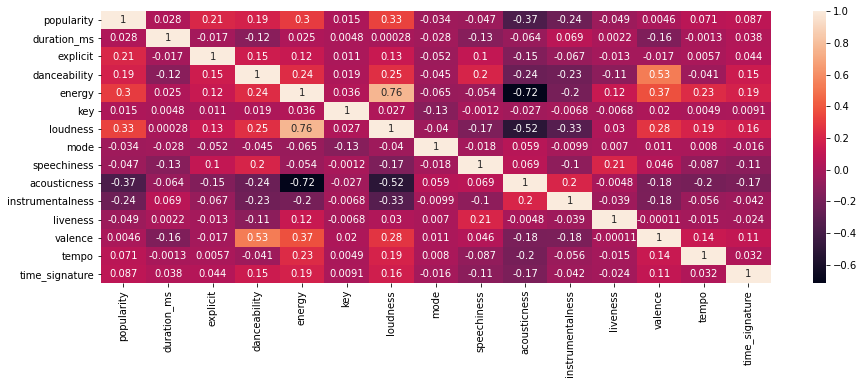

In [13]:
plt.figure(figsize=(15,5))
corrMatrix = total_songs.corr()
sns.heatmap(corrMatrix, annot=True)
plt.show()

* Observing the plot above we see a strong linear relationship between the energy and the loudness of the songs.Also a medium linear relationship between valence and danceability is observed.Aside from these to variables the rest of the variables do not show any strong inter-dependencies

### Exploration of the Valence


* In this section we will use the "total_songs" dataset to find and study the behavior of the valence with the song features.

Text(0.5, 1.0, 'Valence over the years')

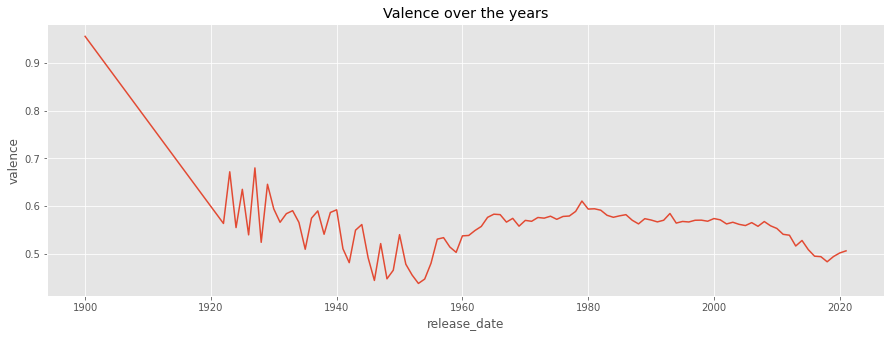

In [14]:
total_songs['release_date'] = pd.to_datetime(total_songs['release_date'])
valence_per_year = total_songs.groupby(total_songs.release_date.dt.year).mean()['valence']
plt.style.use("ggplot")
plt.figure(figsize=(15,5))
sns.lineplot(x=valence_per_year.index,y=valence_per_year)
plt.title("Valence over the years")

* In the figure __Valence over the years__  we can see how the average valence is formed over the years. We can see that the songs coming out in the 1900 had the highest valence. Thats means that the songs back then were happier and more joyable .From 1900 to 1920 we see an abrupt decrease of the valance meaning that the songs were less happier.Thats a very intersting fact , the reason why the songs were so "sad" was the start of the World War I from 1914 to 1918. The smallest values of the valence are between 1939 - 1950. Thats also an intersting fact because between this decade the World War II started.After the end of the World War II the songs which were written seems to be happier.

Text(0.5, 1.0, 'Valence depending on the Danceability')

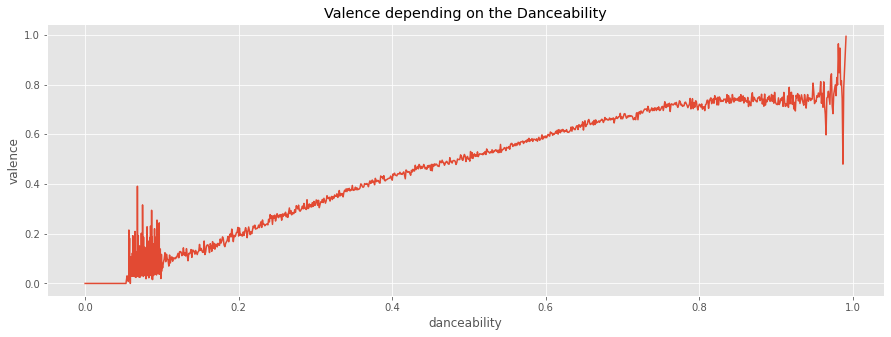

In [15]:
valence_and_danceability = total_songs.groupby(total_songs.danceability).mean()['valence']
plt.style.use("ggplot")
plt.figure(figsize=(15,5))
sns.lineplot(x=valence_and_danceability.index,y=valence_and_danceability)
plt.title("Valence depending on the Danceability")

* In the figure __Valence depending on the Danceability__ we can see how the average valence varies depending on the danceability of each song. In general points we observe that as the danceability increases  so does the valence of the songs.Its very important to mention that we have same songs with low danceability that have relatively high valence and some songs with high danceability that have almost the same valence.

Text(0, 0.5, 'Valence')

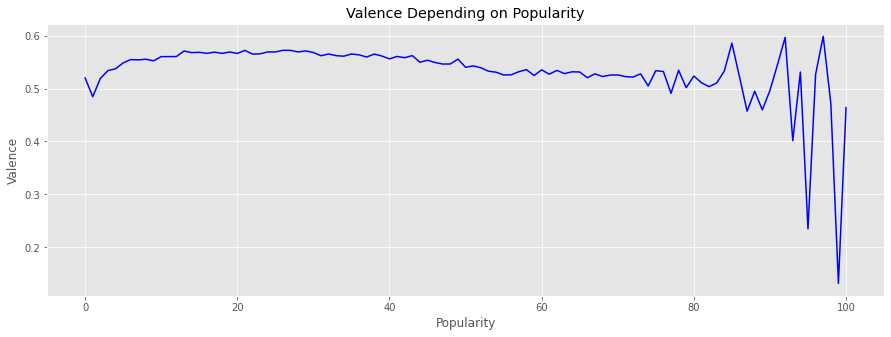

In [16]:
valence_and_popularity= total_songs.groupby(total_songs.popularity).mean()['valence']
valence_and_popularity = pd.DataFrame(valence_and_popularity).reset_index()
valence_and_popularity
plt.figure(figsize=(15,5))
plt.plot(valence_and_popularity.popularity,valence_and_popularity.valence,color="blue")
plt.title("Valence Depending on Popularity")
plt.xlabel("Popularity")
plt.ylabel("Valence")

* In the figure __Valence depending on Popularity__ we can see how the average valence varies depending on the popularity of each song. We see that a lot of songs with low popularity have the almost the same valence with songs with larger popularity.Also we can see that the songs with low valence have very low popularity.Thats because the low valence corresponds to sadness or less happier songs that people do not prefer.

Text(0.5, 1.0, 'Valence Depending The Speechiness')

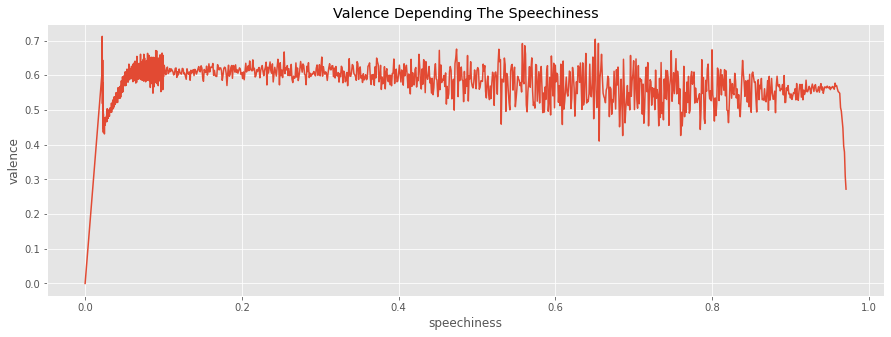

In [17]:
valence_and_speechiness = total_songs.groupby(total_songs.speechiness).mean()['valence']
plt.figure(figsize=(15,5))
sns.lineplot(x=valence_and_speechiness.index,y=valence_and_speechiness)
plt.title("Valence Depending The Speechiness")

* In the figure __Valence Depending The Speechiness__ we can see how the average valence varies depending on the speechiness of each song.We can observe that the songs with very low speechiness thei valence begins from very low levels and reaches relatively high. The songs with speedchiness 0.2 to 0.9 we see that their average valence is between 0.7 and 0.4.As paradoxical as it sounds there are songs with low valence with high speedchiness.

## Creation of the model 

* In this section of the assignment in order to study how track features influence valence we will use the "track_features" dataset.
* To do this we will use __Multiple Linear Regression__.Our dependent variable will be "valence" and the rest of them will be the independent ones.
* Also we will create a new dataset called "track_features_1" in order to save the feautures with the correct order. The columns "Song ID" and "type" arent very important for our analysis.

In [18]:
track_features_1= track_features.reset_index(drop=True).rename({"index":"index"},axis=1)
track_features_1=track_features_1.drop(["Song_ID","type"],axis=1)
track_features_1 = track_features_1[["danceability" ,"energy" ,"key" ,"loudness" ,"mode","speechiness","acousticness","instrumentalness",\
                                         "liveness","tempo","duration_ms","time_signature","valence"]]
track_features_1

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,tempo,duration_ms,time_signature,valence
0,0.645,0.4450,0,-13.338,1,0.4510,0.674,0.744000,0.1510,104.851,126903,3,0.1270
1,0.695,0.2630,0,-22.136,1,0.9570,0.797,0.000000,0.1480,102.009,98200,1,0.6550
2,0.434,0.1770,1,-21.180,1,0.0512,0.994,0.021800,0.2120,130.418,181640,5,0.4570
3,0.321,0.0946,7,-27.961,1,0.0504,0.995,0.918000,0.1040,169.980,176907,3,0.3970
4,0.402,0.1580,3,-16.900,0,0.0390,0.989,0.130000,0.3110,103.220,163080,4,0.1960
...,...,...,...,...,...,...,...,...,...,...,...,...,...
586667,0.560,0.5180,0,-7.471,0,0.0292,0.785,0.000000,0.0648,131.896,258267,4,0.2110
586668,0.765,0.6630,0,-5.223,1,0.0652,0.141,0.000297,0.0924,150.091,153293,4,0.6860
586669,0.535,0.3140,7,-12.823,0,0.0408,0.895,0.000150,0.0874,145.095,187601,4,0.0663
586670,0.696,0.6150,10,-6.212,1,0.0345,0.206,0.000003,0.3050,90.029,142003,4,0.4380


#### __Setting up the Multiple Linear Regression model.__

In [19]:
model = smf.ols(formula="valence ~ danceability+energy+key+loudness+mode+speechiness \
                +acousticness+instrumentalness+liveness+tempo+duration_ms+time_signature  ", data=track_features_1)
songs_model = model.fit()
songs_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                valence   R-squared:                       0.409
Model:                            OLS   Adj. R-squared:                  0.409
Method:                 Least Squares   F-statistic:                 3.387e+04
Date:                Wed, 31 Aug 2022   Prob (F-statistic):               0.00
Time:                        13:27:49   Log-Likelihood:             1.1753e+05
No. Observations:              586672   AIC:                        -2.350e+05
Df Residuals:                  586659   BIC:                        -2.349e+05
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           -0.4213      0.003   -125.104      0.000      -0.428      -0.415
danceability         0.7842      0.002    447.890      0.000       0.781       0.788
energy               0.5552      0.002    271.337      0.000       0.551       0.559
key                  0.0006   7.41e-05      7.783      0.000       0.000       0.001
loudness            -0.0092    8.6e-05   -107.336      0.000      -0.009      -0.009
mode                 0.0225      0.001     40.841      0.000       0.021       0.024
speechiness         -0.1237      0.002    -77.272      0.000      -0.127      -0.121
acousticness         0.1960      0.001    179.538      0.000       0.194       0.198
instrumentalness    -0.0620      0.001    -58.170      0.000      -0.064      -0.060
liveness             0.0133      0.001      8.906      0.000       0.010       0.016
tempo                0.0009   9.02e-06    101.861      0.000       0.001       0.001
duration_ms      -2.107e-07   2.08e-09   -101.205      0.000   -2.15e-07   -2.07e-07
time_signature      -0.0033      0.001     -5.884      0.000      -0.004      -0.002
==============================================================================
Omnibus:                     4623.749   Durbin-Watson:                   1.703
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4654.912
Skew:                          -0.208   Prob(JB):                         0.00
Kurtosis:                       2.871   Cond. No.                     3.71e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.71e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

* By seeing the summary of the "songs model" we can see that our intercept variable has negative price.In our case with the valence of the songs a negative intercept cant be interpreted correctly.To cure this problem we will "centered" the data by substracting the mean of each variable from its self.
* We will save the new dataset in a new variable called "data centered".

In [20]:
center_function = lambda x: x - x.mean()
data_centered = center_function(track_features_1.iloc[:,:-1])
data_centered["valence"] = track_features_1["valence"]
data_centered

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,tempo,duration_ms,time_signature,valence
0,0.081395,-0.097068,-5.22165,-3.132867,0.34118,0.346139,0.224169,0.630554,-0.06291,-13.610786,-103153.404006,-0.873422,0.1270
1,0.131395,-0.279068,-5.22165,-11.930867,0.34118,0.852139,0.347169,-0.113446,-0.06591,-16.452786,-131856.404006,-2.873422,0.6550
2,-0.129605,-0.365068,-4.22165,-10.974867,0.34118,-0.053661,0.544169,-0.091646,-0.00191,11.956214,-48416.404006,1.126578,0.4570
3,-0.242605,-0.447468,1.77835,-17.755867,0.34118,-0.054461,0.545169,0.804554,-0.10991,51.518214,-53149.404006,-0.873422,0.3970
4,-0.161605,-0.384068,-2.22165,-6.694867,-0.65882,-0.065861,0.539169,0.016554,0.09709,-15.241786,-66976.404006,0.126578,0.1960
...,...,...,...,...,...,...,...,...,...,...,...,...,...
586667,-0.003605,-0.024068,-5.22165,2.734133,-0.65882,-0.075661,0.335169,-0.113446,-0.14911,13.434214,28210.595994,0.126578,0.2110
586668,0.201395,0.120932,-5.22165,4.982133,0.34118,-0.039661,-0.308831,-0.113149,-0.12151,31.629214,-76763.404006,0.126578,0.6860
586669,-0.028605,-0.228068,1.77835,-2.617867,-0.65882,-0.064061,0.445169,-0.113296,-0.12651,26.633214,-42455.404006,0.126578,0.0663
586670,0.132395,0.072932,4.77835,3.993133,0.34118,-0.070361,-0.243831,-0.113443,0.09109,-28.432786,-88053.404006,0.126578,0.4380


* Now we will rerun the same procedure and will make a OLS regression but instead of the "track_features_1" we will use the new one named "data_centered".

In [21]:
model_centered = smf.ols(formula="valence ~ danceability+energy+key+loudness+mode+speechiness \
                +acousticness+instrumentalness+liveness+tempo+duration_ms+time_signature  ", data=data_centered)
songs_model_centered = model_centered.fit()
songs_model_centered .summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                valence   R-squared:                       0.409
Model:                            OLS   Adj. R-squared:                  0.409
Method:                 Least Squares   F-statistic:                 3.387e+04
Date:                Wed, 31 Aug 2022   Prob (F-statistic):               0.00
Time:                        13:27:50   Log-Likelihood:             1.1753e+05
No. Observations:              586672   AIC:                        -2.350e+05
Df Residuals:                  586659   BIC:                        -2.349e+05
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            0.5523      0.000   2136.041      0.000       0.552       0.553
danceability         0.7842      0.002    447.890      0.000       0.781       0.788
energy               0.5552      0.002    271.337      0.000       0.551       0.559
key                  0.0006   7.41e-05      7.783      0.000       0.000       0.001
loudness            -0.0092    8.6e-05   -107.336      0.000      -0.009      -0.009
mode                 0.0225      0.001     40.841      0.000       0.021       0.024
speechiness         -0.1237      0.002    -77.272      0.000      -0.127      -0.121
acousticness         0.1960      0.001    179.538      0.000       0.194       0.198
instrumentalness    -0.0620      0.001    -58.170      0.000      -0.064      -0.060
liveness             0.0133      0.001      8.906      0.000       0.010       0.016
tempo                0.0009   9.02e-06    101.861      0.000       0.001       0.001
duration_ms      -2.107e-07   2.08e-09   -101.205      0.000   -2.15e-07   -2.07e-07
time_signature      -0.0033      0.001     -5.884      0.000      -0.004      -0.002
==============================================================================
Omnibus:                     4623.749   Durbin-Watson:                   1.703
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4654.912
Skew:                          -0.208   Prob(JB):                         0.00
Kurtosis:                       2.871   Cond. No.                     1.08e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.08e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

* The problem with the negative intercept has been solved and we can interprent it correctly now.

### Selecting Variables with the Stepwise Procedure

* In this section of the code we will use Stepwise Procedure in order to drop any insignificant variable, if exists, and specifically the "Forward type". This kind of procedure iteratively adds variables in order to find the best model with the most significant ones. The result of the procude is stored in the variable "best_model".

In [22]:
def process_subset(y, data, feature_set):
    X = data.loc[:, feature_set].values
    X = sm.add_constant(X)
    names = ['intercept']
    names.extend(feature_set)
    model = sm.OLS(y, X)
    model.data.xnames = names
    regr = model.fit()
    return regr

In [23]:
def forward_add_variable(data, exog, selected, to_select):
    best_rsquared = 0
    best_model = None
    best_column = None
    y = data.loc[:, exog]
    
    for column in to_select:
        new_selected = selected + [column]
        regr = process_subset(y, data, new_selected)
        if regr.rsquared > best_rsquared:
            best_rsquared = regr.rsquared
            best_model = regr
            best_column = column
    
    return best_model, best_column

In [24]:
def forward_stepwise_selection(data, exog):

    best_models = []
    best_model = None
    selected = []
    to_select = [ x for x in data.columns if x != exog ]

    p = len(to_select) + 1

    for i in range(1, p):
        print(f'Finding the best model for {i} variable{"s" if i > 1 else ""}')
        model, best_column = forward_add_variable(data, exog, selected, to_select)
        selected.append(best_column)
        to_select.remove(best_column)
        if not best_model or model.rsquared_adj > best_model.rsquared_adj:
            best_model = model
        print(selected)
        best_models.append(model)
        
    print(f'Fitted {1 + p*(p+1)//2} models')
    return best_model, best_models

In [25]:
best_model, _ = forward_stepwise_selection(data_centered,"valence")
print('Best overall model:', len(best_model.model.exog_names), best_model.model.exog_names)

Finding the best model for 1 variable
['danceability']
Finding the best model for 2 variables
['danceability', 'energy']
Finding the best model for 3 variables
['danceability', 'energy', 'acousticness']
Finding the best model for 4 variables
['danceability', 'energy', 'acousticness', 'tempo']
Finding the best model for 5 variables
['danceability', 'energy', 'acousticness', 'tempo', 'duration_ms']
Finding the best model for 6 variables
['danceability', 'energy', 'acousticness', 'tempo', 'duration_ms', 'loudness']
Finding the best model for 7 variables
['danceability', 'energy', 'acousticness', 'tempo', 'duration_ms', 'loudness', 'speechiness']
Finding the best model for 8 variables
['danceability', 'energy', 'acousticness', 'tempo', 'duration_ms', 'loudness', 'speechiness', 'instrumentalness']
Finding the best model for 9 variables
['danceability', 'energy', 'acousticness', 'tempo', 'duration_ms', 'loudness', 'speechiness', 'instrumentalness', 'mode']
Finding the best model for 10 varia

In [26]:
best_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                valence   R-squared:                       0.409
Model:                            OLS   Adj. R-squared:                  0.409
Method:                 Least Squares   F-statistic:                 3.387e+04
Date:                Wed, 31 Aug 2022   Prob (F-statistic):               0.00
Time:                        13:28:01   Log-Likelihood:             1.1753e+05
No. Observations:              586672   AIC:                        -2.350e+05
Df Residuals:                  586659   BIC:                        -2.349e+05
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
intercept            0.5523      0.000   2136.041      0.000       0.552       0.553
danceability         0.7842      0.002    447.890      0.000       0.781       0.788
energy               0.5552      0.002    271.337      0.000       0.551       0.559
acousticness         0.1960      0.001    179.538      0.000       0.194       0.198
tempo                0.0009   9.02e-06    101.861      0.000       0.001       0.001
duration_ms      -2.107e-07   2.08e-09   -101.205      0.000   -2.15e-07   -2.07e-07
loudness            -0.0092    8.6e-05   -107.336      0.000      -0.009      -0.009
speechiness         -0.1237      0.002    -77.272      0.000      -0.127      -0.121
instrumentalness    -0.0620      0.001    -58.170      0.000      -0.064      -0.060
mode                 0.0225      0.001     40.841      0.000       0.021       0.024
liveness             0.0133      0.001      8.906      0.000       0.010       0.016
key                  0.0006   7.41e-05      7.783      0.000       0.000       0.001
time_signature      -0.0033      0.001     -5.884      0.000      -0.004      -0.002
==============================================================================
Omnibus:                     4623.749   Durbin-Watson:                   1.703
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4654.912
Skew:                          -0.208   Prob(JB):                         0.00
Kurtosis:                       2.871   Cond. No.                     1.08e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.08e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

* By seening the summary of the best model that occured from the stepwise forward procedure we see that the final model consists of all the variables because all of them are statistically significant. Also we see that the Adj. R-squared is 0.409 meaning that 40.9% of the variance of the  valence is explained by the model.

### Multicollinearity Assumption 

* In this section of the code the Multicollinearity of the covarietes will be checked. Multicollinearity is the statically high linear relationship between one explanatory variable with the rest of the explanatories, to identify them we need to use the “Variance Inflation Factors”(VIF). The criterion that we use to remove the covariates is if their VIF value is greater than 10 then we have multicollinearity effect. In our analysis no covariete seems to violate the multicollinearity so there is not need to remove some.

In [27]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant
X = add_constant(data_centered.iloc[:, 0:-1])
pd.Series([variance_inflation_factor(X.values, i) for i in range(X.shape[1])],index=X.columns)

const               1.000000
danceability        1.265116
energy              3.975312
key                 1.017977
loudness            2.868541
mode                1.024661
speechiness         1.239948
acousticness        2.169745
instrumentalness    1.211533
liveness            1.126191
tempo               1.078050
duration_ms         1.039814
time_signature      1.070317
dtype: float64

## Model Assumptions

#### Normality of the residuals

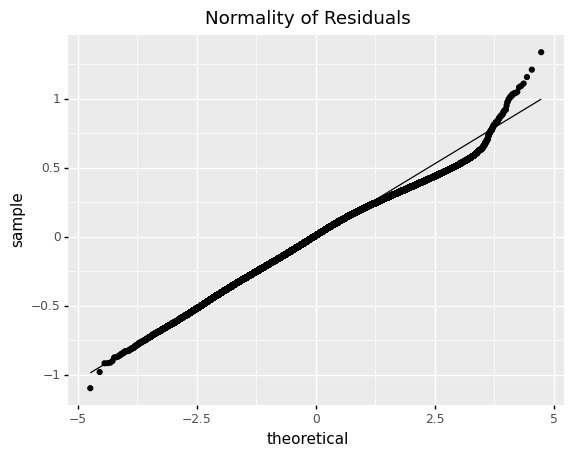

<ggplot: (175314305043)>

In [28]:
ggplot(data=songs_model_centered.resid.to_frame().rename(columns={0: 'resid'})) +\
    geom_qq(mapping=aes(sample='resid')) +\
    geom_qq_line(mapping=aes(sample='resid'))+ggtitle("Normality of Residuals")

* As fas as the normality is concerned we see that our data residuals are normaly distributed.

#### Independence of the residuals 

In [29]:
sm.stats.stattools.durbin_watson(songs_model_centered.resid)

1.7031706734334744

* As far as the independence of the residuals is conserned the Durbin Watson metric shows that we have independence of residuals.

#### Linearity of the residuals 

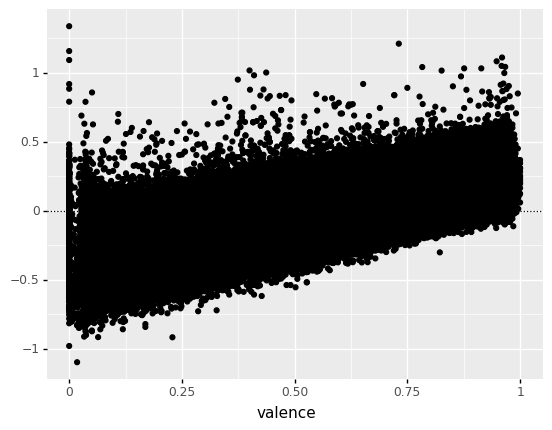

<ggplot: (175314296670)>

In [30]:
ggplot(data=data_centered) +\
    geom_hline(yintercept=0, color='black', linetype='dotted') +\
    geom_point(mapping=aes(x='valence', y=best_model.resid))

* As far as the linearity of the residuals is conserned the figure above shows that there is linearity.

## Interpretation of the linear Regression Model 

In this section of the assignment we will interpret the behavior of each variable in "Valence". Because our data has been centered in order to fix the negative intercept the interpretation of the model also changes.

 * __Intercept__ : The value of the intercept is 0.5523.That means that when all the other song features are at their mean the valence of the song will be 0.5523.
 * __danceability__ : one unit increase in dancability will increase the valence of the song by 0.7842 when the other covarietes are constant.
 * __energy__ : one unit increase in the energy of the song will increase the valence of the song by 0.5552 when the other covarietes are constant.
 * __acousticness__ : one unit increase in acoustiness of the song will increase the valence of the song by 0.1960 when the other covarietes are constant.
 * __loudness__  : one unit increase in the loodness of the song will decrease the valence of the song by 0.0092 when the other covarietes are constant.
 * __speechiness__ : one unit increse in the speechiness of the song will decrease the valence of the song by 0.1237 when the other covarietes are constant.
 * __instrumentalness__ : one unit increse in the instrumentalness of the song will decrease the valence of the song by 0.0620 when the other covarietes are constant.
 * __liveness__ : one unit increase in the liveness of the song will increase the valence of the song by 0.0133 when all the other covariates when the other covarietes are constant.

# Q2: Predict Valence

Use Machine Learning techniques to predict valence based on track features:

* You will use at least three different methods. For each methods you should ensure that you tune your hyperparameters as best as you can.

* Once you identify the best method and hyperparameters, explain, to the extent that is possible, which features influence the valence metric.

* You will evaluate your predictions on a holdout testing dataset that will be provided to you. Your evaluation and the value of the MAE on the holdout testing dataset must be included at the end of your submission.

In [31]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

* Its very important to split our dataset in "train" and "test". A good split is 80% train and 20% test.In the "train" dataset we will train our model to predict the valence given the specific feautures. After the training of the model we will use the test dataset in order to test the prediction abilities of the model. The model we will be evaluated by the use of the Mean Absolute Error metric. This metric refers to the magnitude of difference between the prediction of an observation and the true value of that observation. The lower the mae is the better the prediction.
* In the "track_features_2" we will save the "track_features_1" dataset but with the valence as the last column in order to extract her more easily while seperating the dataset in x and y values. The "x" contains all the independent variables , and the "y" contains the dependent variable "valence".
* Its very important to mention the type of machine learning techniques we will use. Because our variable is continuous taking values from 0 to 1 we will use the Regression Type Machine Learning Techiques.

In [32]:
track_features_2 = track_features_1[["danceability" ,"energy" ,"key" ,"loudness" ,"mode","speechiness","acousticness","instrumentalness","liveness","tempo","duration_ms","time_signature","valence"]]
track_features_2

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,tempo,duration_ms,time_signature,valence
0,0.645,0.4450,0,-13.338,1,0.4510,0.674,0.744000,0.1510,104.851,126903,3,0.1270
1,0.695,0.2630,0,-22.136,1,0.9570,0.797,0.000000,0.1480,102.009,98200,1,0.6550
2,0.434,0.1770,1,-21.180,1,0.0512,0.994,0.021800,0.2120,130.418,181640,5,0.4570
3,0.321,0.0946,7,-27.961,1,0.0504,0.995,0.918000,0.1040,169.980,176907,3,0.3970
4,0.402,0.1580,3,-16.900,0,0.0390,0.989,0.130000,0.3110,103.220,163080,4,0.1960
...,...,...,...,...,...,...,...,...,...,...,...,...,...
586667,0.560,0.5180,0,-7.471,0,0.0292,0.785,0.000000,0.0648,131.896,258267,4,0.2110
586668,0.765,0.6630,0,-5.223,1,0.0652,0.141,0.000297,0.0924,150.091,153293,4,0.6860
586669,0.535,0.3140,7,-12.823,0,0.0408,0.895,0.000150,0.0874,145.095,187601,4,0.0663
586670,0.696,0.6150,10,-6.212,1,0.0345,0.206,0.000003,0.3050,90.029,142003,4,0.4380


In [33]:
x= track_features_2.iloc[:,:-1].values # independent variables
y= track_features_2.iloc[:,-1:].values # dependent variable
x_train,x_test,y_train,y_test =train_test_split(x,y,test_size=0.2,random_state=0)

* Also in many models we need to scale our data especialy the independent variables as their metrics are complitely differnent from each other.In this way we manage to scale them with the same metric. These are the K- Nearest Neighbors and the Ridge Regression models.

In [34]:
scaler = StandardScaler()
x_train_scaled  =scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

### 1st Machine Learning Method : XGBoost Regression

* In order to have the absolute best performance of our model , we added some parameters in order for the model to be well adapted to our data.
   * We test the learning rate of the model.This is the step size shrinkage used in update to prevent overfitting.
   * Also we used 8 cores of our processor.
   * Using the GridSearchCV we managed to loop through the predefined hyperparameters and fit our model on the train dataset.
   * Our best XGBoost Regression Model consists of gamma = 0.05 , learning_rate=0.5.
   * The Mean Absolute Error of the model is __0.13461992038817733.__

In [35]:
import xgboost as xgb
from sklearn.metrics import mean_absolute_error

In [36]:
param_grid = dict(
    n_jobs=[8],
    learning_rate=[0.1, 0.5,0.6,0.7],gamma=[0.05,0.1,0.5]) 


In [38]:
%%time
model = xgb.XGBRegressor(random_state=1, verbosity=1)
xgboost_reg= GridSearchCV(estimator=model,param_grid=param_grid,)
xgboost_model = xgboost_reg.fit(x_train, y_train)

Wall time: 12min 29s


In [39]:
xgboost_model.best_params_

{'gamma': 0.05, 'learning_rate': 0.5, 'n_jobs': 8}

In [40]:
prediction_3=xgboost_model.predict(x_test)
prediction_3

array([0.90752643, 0.42552888, 0.27791905, ..., 0.65989363, 0.83831143,
       0.62841225], dtype=float32)

In [41]:
print("Mean Absolute Error :",mean_absolute_error(y_test,prediction_3))

Mean Absolute Error : 0.13461992038817733


### 2nd Machine Learning Method : Ridge Regression


* In this model we used as parameter the alpha of the ridge regression.With the "np.arange" we manage to search the best alpha value among 0 and 10 with step 0.1. The best value of alpha the fits better to our data is the 6.5.
* Also we did a 10 RepeatedKFOLd validation making the validator to be repeated 3 times.
* The Mean Absolute Error of the Ridge Regression is __0.1611181286107891__.

In [42]:
from sklearn import linear_model
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge
from sklearn.model_selection import RepeatedKFold

In [43]:
%%time
ridge = Ridge()
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
param = dict()
param['alpha'] = np.arange(0, 10,0.1)
ridge_reg = GridSearchCV(ridge ,param, cv=cv, n_jobs=8)
ridge_reg.fit(x_train_scaled, y_train)

Wall time: 1min 12s


GridSearchCV(cv=RepeatedKFold(n_repeats=3, n_splits=10, random_state=1),
             estimator=Ridge(), n_jobs=8,
             param_grid={'alpha': array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. , 1.1, 1.2,
       1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2. , 2.1, 2.2, 2.3, 2.4, 2.5,
       2.6, 2.7, 2.8, 2.9, 3. , 3.1, 3.2, 3.3, 3.4, 3.5, 3.6, 3.7, 3.8,
       3.9, 4. , 4.1, 4.2, 4.3, 4.4, 4.5, 4.6, 4.7, 4.8, 4.9, 5. , 5.1,
       5.2, 5.3, 5.4, 5.5, 5.6, 5.7, 5.8, 5.9, 6. , 6.1, 6.2, 6.3, 6.4,
       6.5, 6.6, 6.7, 6.8, 6.9, 7. , 7.1, 7.2, 7.3, 7.4, 7.5, 7.6, 7.7,
       7.8, 7.9, 8. , 8.1, 8.2, 8.3, 8.4, 8.5, 8.6, 8.7, 8.8, 8.9, 9. ,
       9.1, 9.2, 9.3, 9.4, 9.5, 9.6, 9.7, 9.8, 9.9])})

In [44]:
ridge_reg.best_params_

{'alpha': 6.5}

In [45]:
prediction = ridge_reg.predict(x_test_scaled)

In [46]:
print("Mean Absolute Error :",mean_absolute_error(y_test,prediction))

Mean Absolute Error : 0.1611181286107891


### 3rd Machine Learning Method: K-Nearest Neighbors Regression

* K- Nearest Neighbors Regression we used 3 different hyperparameters in order to find the best model which adapts better to our data.
  * Firstly, we gave the model 3 possible numbers of neighbors in order to find the best ones.
  * Secondly, we gave the model 3 possible metrics to use to calculate the similarity.
  * Thirdly , we gave the the model 2 possible weight metrics. The weights check whether adding weights to the data points is beneficial for our model or not. Analytically , 
    * Uniform : assigns no weight to the model.
    * Distance :weighs points by the inverse of their distances meaning nearer points will have more weight than the farther points.
  * Additionaly we used a 3FOLD Cross Validation using 8 cores of our computer.
* Finally we ended up with the best parameters which are : 
  * Metric : manhatan
  * Neighbors : 12 
  * Weights : distance 
* The Mean Absolute Error of our model is  __0.1332448121122507__.

In [47]:
from sklearn.neighbors import KNeighborsRegressor
from skimage.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error

In [48]:
%%time
from sklearn.model_selection import GridSearchCV
params = {'n_neighbors':[9,10,12],'metric' : ['minkowski','euclidean','manhattan'],'weights' : ['uniform','distance'],}

knn = KNeighborsRegressor()

knn_model= GridSearchCV(knn, params,n_jobs=8,cv=2)
knn_model.fit(x_train_scaled,y_train)

Wall time: 58min 15s


GridSearchCV(cv=2, estimator=KNeighborsRegressor(), n_jobs=8,
             param_grid={'metric': ['minkowski', 'euclidean', 'manhattan'],
                         'n_neighbors': [9, 10, 12],
                         'weights': ['uniform', 'distance']})

In [49]:
knn_model.best_params_

{'metric': 'manhattan', 'n_neighbors': 12, 'weights': 'distance'}

In [50]:
pred=knn_model.predict(x_test_scaled) 
pred

array([[0.967     ],
       [0.50849352],
       [0.41155156],
       ...,
       [0.55558299],
       [0.84174635],
       [0.64511938]])

In [51]:
print("Mean Absolute Error :",mean_absolute_error(y_test,pred))

Mean Absolute Error : 0.13324481030763194


# Validation Section of the Machine Learning Methods 

* In this section of the assignment we will test the predictive abilites of our models to find the lowest mae in the out-of sample procedure and therefore the best model for prediction.
* For this task we will use a txt file that contains 1162 song ids. Then we will try to find their features via Spotify API.After these procedures we will evaluate the models in order to find the Mean Absolute Error of our out of sample prediction.

#### __Importing the "spotify_ids.txt" file from our directory.__

In [52]:
header=["Song_id"]
out_of_sample_songs=pd.read_csv("spotify_ids.txt",skiprows=0,names=header)
out_of_sample_songs

,Song_id
0,7lPN2DXiMsVn7XUKtOW1CS
1,5QO79kh1waicV47BqGRL3g
2,0VjIjW4GlUZAMYd2vXMi3b
3,4MzXwWMhyBbmu6hOcLVD49
4,5Kskr9LcNYa0tpt5f0ZEJx
...,...
1157,4lUmnwRybYH7mMzf16xB0y
1158,1fzf9Aad4y1RWrmwosAK5y
1159,3E3pb3qH11iny6TFDJvsg5
1160,3yTkoTuiKRGL2VAlQd7xsC


#### __Setting up the Spotify API to find the features of the songs.__

* The while loop iteratively finds the features that correspond to the specific song id and store them into the features dictionary.
* The code below has been turned into Raw NBConvert because was used just once for the finding of the new song features.

* The next 4 steps below are needed to : 
    * Store the Features as Dataframe.
    * Make the Song ID column the index of the dataset.
    * Saving the "tracks_out" dataset with the features into a csv named "validation_dataset" in order to skip doing the above procudure every time we open the notebook.
    * Re import the "validation_dataset" into the Jupyter notebook.
* Additionally to all the above , we moved the "valence" column to end of the dataset in order to be more clearer which variable is the depedented one.

#### __Importing the  validation dataset with the features of the new songs that were given to us.__

In [53]:
validation_dataset = pd.read_csv("validation_dataset.csv")
validation_dataset = validation_dataset[["danceability" ,"energy" ,"key" ,"loudness" ,"mode","speechiness","acousticness","instrumentalness",\
                                         "liveness","tempo","duration_ms","time_signature","valence"]]
validation_dataset

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,tempo,duration_ms,time_signature,valence
0,0.585,0.436,10,-8.761,1,0.0601,0.72100,0.000013,0.1050,143.874,242014,4,0.132
1,0.680,0.826,0,-5.487,1,0.0309,0.02120,0.000012,0.5430,118.051,215627,4,0.644
2,0.514,0.730,1,-5.934,1,0.0598,0.00146,0.000095,0.0897,171.005,200040,4,0.334
3,0.731,0.573,4,-10.059,0,0.0544,0.40100,0.000052,0.1130,109.928,205090,4,0.145
4,0.907,0.393,4,-7.636,0,0.0539,0.45100,0.000001,0.1350,104.949,205458,4,0.202
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1157,0.596,0.650,9,-5.167,1,0.3370,0.13800,0.000000,0.1400,133.997,257428,4,0.188
1158,0.588,0.850,4,-6.431,1,0.0318,0.16800,0.002020,0.0465,93.003,187310,4,0.768
1159,0.754,0.660,0,-6.811,1,0.2670,0.17900,0.000000,0.1940,83.000,209299,4,0.316
1160,0.584,0.836,0,-4.925,1,0.0790,0.05580,0.000000,0.0663,104.973,202204,4,0.484


* In the next part of the code we will split the dataset into x_val , y_val. The "x_val" dataset will contain the indepented variables of the dataset and the "y_val" dataset will contain the dependent one (valence). Also we scaled the dataset "x_val".

In [54]:
x_val= validation_dataset.iloc[:,:-1].values # independent variables
y_val= validation_dataset.iloc[:,-1:].values # dependent VARIABLE
scaler_out = StandardScaler()
x_val_scaled =scaler_out.fit_transform(x_val)

### Out of sample validation of the  Machine Learning Models

   * In this section of the code we will evaluate the predictive abilities of our models.
   * In order to test the predictive abilities we will run the regression of the in sample model but instead of the argument "x_test" we will use the new dataset named "x_val" which has the new features of the new 1162 songs.After that we will compute the mean_absolute_error(mae) based on the "y_val" values.
   * The "x_val" and "y_val" datasets correspond to the validation dataset.
   * The "mae_evaluation" dataframe contains the in sample and the out of sample Mean Absolute Errors of the 3 models we have created.

#### __Calculation the out of sample predictions of our models.__

In [55]:
from sklearn.metrics import mean_absolute_error
prediction_out_2 = xgboost_model.predict(x_val)
prediction_out_3 = ridge_reg.predict(x_val_scaled) 
prediction_out_4=knn_model.predict(x_val_scaled) 

#### __Making a dataframe with the mae values of our models.__

In [56]:
mae_evaluation = {"In-sample-mae": [mean_absolute_error(y_test,prediction_3),mean_absolute_error(y_test,prediction), mean_absolute_error(y_test,pred)], \
                  "Out-sample-mae":[mean_absolute_error(y_val,prediction_out_2),mean_absolute_error(y_val,prediction_out_3),mean_absolute_error(y_val,prediction_out_4)]}
mae_evaluation= pd.DataFrame(mae_evaluation,index=["XGBoost Regression","Ridge Regression","K-Nearest Neighbors Regression"])
mae_evaluation

,In-sample-mae,Out-sample-mae
XGBoost Regression,0.134620,0.157130
Ridge Regression,0.161118,0.159378
K-Nearest Neighbors Regression,0.133245,0.170337


### Selection of the best model for out of sample prediction

Having calculate the mean absolute error in the in sample procedure and out-of-sample procedure we can decide which model is the best for prediction. We can observe that the K-Nearest Neighbors Regression Method has in sample mae 0.133245 but out of sample mae 0.17033 in contrast to the XGBoost Method which has in sample mae 0.134620 and out of sample 0.157130.
Comparing the mae increase rate from the in sample prediction to the out-of-sample prediction we see that the XGBoost Regression has the best results among the 3 models.

### Conclusion
Our final model for prediction will be the __XGBoost Regression__ model with the following Mean Absolute Error values.
As fas as the question "which features influence the valence metric" is conserned we can say that all the features infuence her , as all variables are taking into account on her computation and they are statistically significant.

In [57]:
mae_evaluation.loc[['XGBoost Regression']]

,In-sample-mae,Out-sample-mae
XGBoost Regression,0.13462,0.15713
